In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn import preprocessing

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/yelp_data/train.csv',header=None)

In [6]:
data_train.columns = ['deceptive','text']

In [7]:
data_train.head(5)

,deceptive,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   deceptive  560000 non-null  int64 
 1   text       560000 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


In [9]:
from sklearn import preprocessing

In [10]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data_train['deceptive']= label_encoder.fit_transform(data_train['deceptive'])

data_train['deceptive'].unique()


array([0, 1])

In [11]:
target_column = 'deceptive'

# Sample the same number of instances from each class
data_train = data_train.groupby(target_column, group_keys=False).apply(lambda x: x.sample(800))


In [12]:
#dataset description
data_train.groupby('deceptive').describe()

text                                                               
          count unique                                                top freq
deceptive                                                                     
0           800    800  Went there to get my husband's ring re-sized. ...    1
1           800    800  I'm a Fan!! \nThe first morning that we were i...    1

In [14]:
yelp_results = {
    "Model" : ["BiLSTM + Attention + GLoVe(100D)","LSTM + GLoVe(100D)","Bidirectional LSTM + GLoVe(50D)" ],
    "Train accuracy" : [ ],
    "Test accuracy": []
}



#Deep Learning Models

## B. BiLSTM + Attention + GLoVe(100D)

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [16]:
df = data_train

In [17]:
df1=df.sample(frac=1)
df1.head()

,deceptive,text
276699,0,"A couple of years ago, we ventured into Heart ..."
554018,1,In a city where most chefs seem to want to ove...
233319,0,Don't do it. We were sorely disappointed. \n...
97331,0,I haaaate being the guy that gives a 2 star re...
83703,0,Food was FANTASTIC!! A+.....as for the Service...


In [18]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['deceptive']= label_encoder.fit_transform(df1['deceptive'])

df1['deceptive'].unique()

array([0, 1])

In [19]:
df1.head()

,deceptive,text
276699,0,"A couple of years ago, we ventured into Heart ..."
554018,1,In a city where most chefs seem to want to ove...
233319,0,Don't do it. We were sorely disappointed. \n...
97331,0,I haaaate being the guy that gives a 2 star re...
83703,0,Food was FANTASTIC!! A+.....as for the Service...


In [20]:
X = df1.text
y = df1.deceptive

In [21]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [22]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [23]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_data(text):
    """
        text: a string

        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower().split()
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+\-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    return text

df1['text'] = df1['text'].apply(clean_data)

<ipython-input-23-705023739236>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding
<ipython-input-23-705023739236>:11: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


In [24]:
X = df1.text
y = df1.deceptive

In [25]:
X = X.map(lambda a: clean_data(a))

In [26]:
from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from keras.preprocessing.text import Tokenizer
import numpy as np
from bs4 import BeautifulSoup
import logging
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, MaxPooling1D, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras import initializers, regularizers, constraints

In [27]:
train, test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [28]:
tokenizer = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer.fit_on_texts(X)
x_train = tokenizer.texts_to_sequences(train)
x_test = tokenizer.texts_to_sequences(test)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(X)


In [29]:
vocab_size = len(word_index)
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in X)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in X])
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in X])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 13553
Longest comment size: 923
Average comment size: 136.573125
Stdev of comment size: 124.61148483480315
Max comment size: 510


In [30]:
from keras.preprocessing.sequence import pad_sequences

processed_post_x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
processed_post_x_test = pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')

processed_x_train = pad_sequences(x_train, maxlen=max_len)
processed_x_test = pad_sequences(x_test, maxlen=max_len)

processed_pre_x_train = pad_sequences(x_train, maxlen=max_len)
processed_pre_x_test = pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', processed_x_train.shape)
print('x_test shape:', processed_x_test.shape)

x_train shape: (1200, 510)
x_test shape: (400, 510)


In [31]:
from keras.layers import Layer

In [32]:
import keras.backend
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.optimizers import Nadam
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [33]:
embeddings_index = {}
f = open('/content/drive/MyDrive/yelp_data/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [34]:
embedding_dim = 100
k = 0
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None and len(embedding_vector) == 100:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix[i] = embedding_vector

In [35]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        """
        Keras Layer that implements an Attention mechanism for temporal data.
        Supports Masking.
        Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Example:
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
        """
        self.supports_masking = True
        #self.init = initializations.get('glorot_uniform')
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        # eij = K.dot(x, self.W) TF backend doesn't support it

        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
    #print weigthted_input.shape
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        #return input_shape[0], input_shape[-1]
        return input_shape[0],  self.features_dim



In [36]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, concatenate
from keras.models import Model
import keras.backend
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from keras.optimizers import Nadam
import matplotlib.pyplot as plt
from keras import backend as K


def get_model():
    review_input = Input(shape=(max_len,), dtype='int32')
    review_input_post = Input(shape=(max_len,), dtype='int32')

    x1 = Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(review_input)
    x1 = Bidirectional(LSTM(60, return_sequences=True))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Attention(max_len)(x1)

    x2 = Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(review_input_post)
    x2 = Bidirectional(LSTM(60, return_sequences=True))(x2)
    x2 = Dropout(0.3)(x2)
    x2 = Attention(max_len)(x2)

    x = concatenate([x1, x2])
    x = Dense(50, activation='relu')(x)
    x= Dropout(0.2)(x)
    x = BatchNormalization()(x)
    preds = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[review_input, review_input_post], outputs=preds)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 510)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 510)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 510, 100)             1355400   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 510, 100)             1355400   ['input_2[0][0]']             
                                                                                              

In [37]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [38]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=10)

In [39]:
history = model.fit([processed_x_train,processed_pre_x_train],y_train, validation_data=([processed_x_test,processed_pre_x_test],y_test), epochs=15,batch_size=32,callbacks=[early_stopping_monitor],verbose=1)


Epoch 1/15
38/38 [==============================] - 26s 361ms/step - loss: 0.6100 - accuracy: 0.6492 - val_loss: 0.6653 - val_accuracy: 0.7100
Epoch 2/15
38/38 [==============================] - 11s 282ms/step - loss: 0.4754 - accuracy: 0.7725 - val_loss: 0.5819 - val_accuracy: 0.7750
Epoch 3/15
38/38 [==============================] - 10s 252ms/step - loss: 0.3556 - accuracy: 0.8525 - val_loss: 0.5677 - val_accuracy: 0.6700
Epoch 4/15
38/38 [==============================] - 11s 275ms/step - loss: 0.2567 - accuracy: 0.9058 - val_loss: 0.4626 - val_accuracy: 0.8025
Epoch 5/15
38/38 [==============================] - 9s 237ms/step - loss: 0.1940 - accuracy: 0.9158 - val_loss: 0.4263 - val_accuracy: 0.8150
Epoch 6/15
38/38 [==============================] - 9s 239ms/step - loss: 0.1281 - accuracy: 0.9550 - val_loss: 0.3741 - val_accuracy: 0.8350
Epoch 7/15
38/38 [==============================] - 8s 205ms/step - loss: 0.1170 - accuracy: 0.9575 - val_loss: 0.4225 - val_accuracy: 0.8175
Ep

In [40]:
loss, test_accuracy = model.evaluate([processed_x_test,processed_pre_x_test],y_test)
print('Test Loss:', loss)
print('Test Accuracy:', test_accuracy)

13/13 [==============================] - 1s 36ms/step - loss: 0.5072 - accuracy: 0.8400
Test Loss: 0.5071622729301453
Test Accuracy: 0.8399999737739563


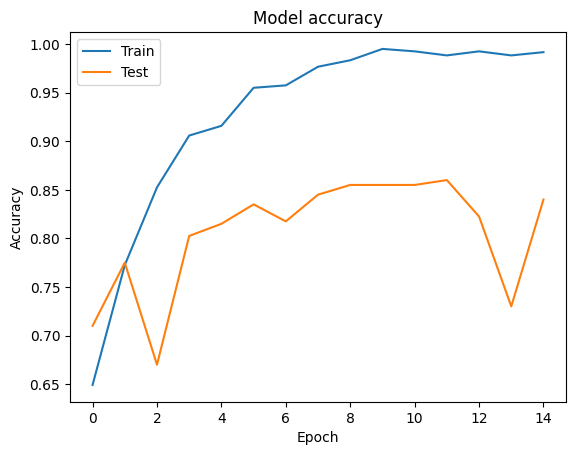

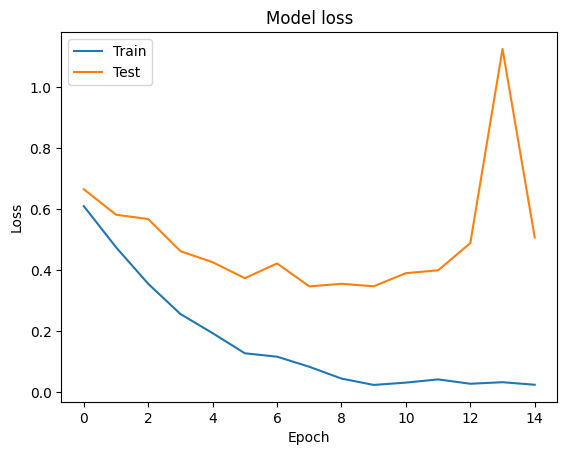

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
yelp_results["Train accuracy"].append(round(history.history['accuracy'][-1], 4))
yelp_results["Test accuracy"].append(round(test_accuracy, 4))


## C. LSTM + GLoVe(100D)

In [43]:
# Initate model
model = Sequential()


model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))


model.add(LSTM(60, return_sequences=True, name='lstm_layer1'))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(LSTM(30, return_sequences=True, name='lstm_layer2'))#kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))#,kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='sigmoid',kernel_regularizer=l2(0.19),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
#model.add(Dense(16, kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 510, 100)          1355400   
                                                                 
 lstm_layer1 (LSTM)          (None, 510, 60)           38640     
                                                                 
 lstm_layer2 (LSTM)          (None, 510, 30)           10920     
                                                                 
 conv1d (Conv1D)             (None, 510, 128)          11648     
                                                                 
 max_pooling1d (MaxPooling1  (None, 170, 128)          0         
 D)                                                              
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                        

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=15,batch_size=32,verbose=1)

Epoch 1/15
38/38 [==============================] - 15s 213ms/step - loss: 17.7844 - accuracy: 0.5167 - val_loss: 12.8440 - val_accuracy: 0.5000
Epoch 2/15
38/38 [==============================] - 6s 157ms/step - loss: 9.7421 - accuracy: 0.6225 - val_loss: 7.0570 - val_accuracy: 0.5925
Epoch 3/15
38/38 [==============================] - 7s 181ms/step - loss: 5.3554 - accuracy: 0.6767 - val_loss: 3.9531 - val_accuracy: 0.8200
Epoch 4/15
38/38 [==============================] - 6s 149ms/step - loss: 3.0309 - accuracy: 0.7108 - val_loss: 2.3544 - val_accuracy: 0.8550
Epoch 5/15
38/38 [==============================] - 4s 116ms/step - loss: 1.7989 - accuracy: 0.7858 - val_loss: 1.5007 - val_accuracy: 0.8475
Epoch 6/15
38/38 [==============================] - 6s 160ms/step - loss: 1.1896 - accuracy: 0.8242 - val_loss: 1.0755 - val_accuracy: 0.8500
Epoch 7/15
38/38 [==============================] - 4s 118ms/step - loss: 0.8554 - accuracy: 0.8667 - val_loss: 0.8842 - val_accuracy: 0.8075
Epo

In [45]:
loss, test_accuracy = model.evaluate(processed_x_test,y_test)

print('Test Loss:', loss)
print('Test Accuracy:', test_accuracy)

13/13 [==============================] - 0s 23ms/step - loss: 0.6028 - accuracy: 0.8575
Test Loss: 0.602827787399292
Test Accuracy: 0.8575000166893005


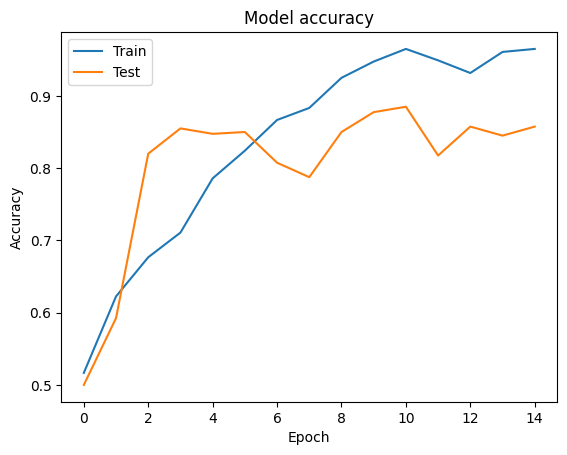

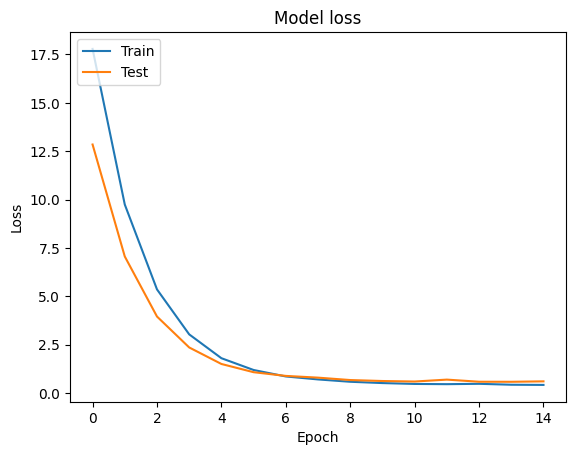

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
yelp_results["Train accuracy"].append(round(history.history['accuracy'][-1], 4))
yelp_results["Test accuracy"].append(round(test_accuracy, 4))


## D. Bidirectional LSTM + GLoVe(50D)

In [48]:
embeddings_index_d = {}
f = open('/content/drive/MyDrive/yelp_data/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_d[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index_d))

Found 400000 word vectors.


In [49]:
embedding_dim = 50
k = 0
embedding_matrix_d = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index_d.get(word)
    if embedding_vector is not None and len(embedding_vector) == 50:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix_d[i] = embedding_vector

In [50]:
# Initate model
model = Sequential()


model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix_d], input_length=max_len, trainable=True))

model.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1, name='lstm_layer1')))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(Dense(50, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 510, 50)           677700    
                                                                 
 bidirectional_2 (Bidirecti  (None, 510, 100)          40400     
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                      

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=15,batch_size=128,verbose=1)

Epoch 1/15
10/10 [==============================] - 44s 4s/step - loss: 11.2218 - accuracy: 0.5617 - val_loss: 10.3048 - val_accuracy: 0.6200
Epoch 2/15
10/10 [==============================] - 38s 4s/step - loss: 9.6098 - accuracy: 0.6983 - val_loss: 8.8987 - val_accuracy: 0.6275
Epoch 3/15
10/10 [==============================] - 37s 4s/step - loss: 8.2305 - accuracy: 0.7375 - val_loss: 7.6640 - val_accuracy: 0.6625
Epoch 4/15
10/10 [==============================] - 38s 4s/step - loss: 7.0314 - accuracy: 0.7933 - val_loss: 6.5932 - val_accuracy: 0.6875
Epoch 5/15
10/10 [==============================] - 37s 4s/step - loss: 5.9945 - accuracy: 0.8275 - val_loss: 5.6686 - val_accuracy: 0.7650
Epoch 6/15
10/10 [==============================] - 35s 4s/step - loss: 5.1103 - accuracy: 0.8267 - val_loss: 4.8690 - val_accuracy: 0.7575
Epoch 7/15
10/10 [==============================] - 36s 4s/step - loss: 4.3536 - accuracy: 0.8500 - val_loss: 4.1808 - val_accuracy: 0.7575
Epoch 8/15
10/10 [

In [52]:
loss, test_accuracy = model.evaluate(processed_x_test,y_test)


print('Test Loss:', loss)
print('Test Accuracy:', test_accuracy)

13/13 [==============================] - 3s 264ms/step - loss: 1.3014 - accuracy: 0.8075
Test Loss: 1.3013972043991089
Test Accuracy: 0.8075000047683716


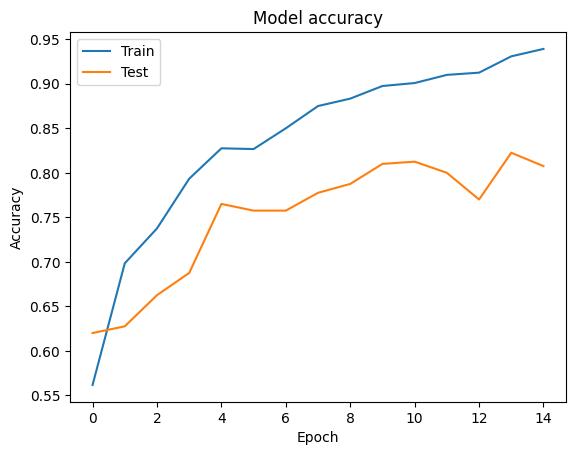

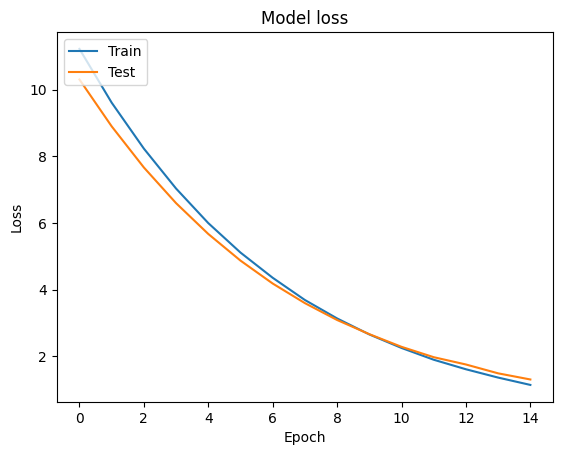

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
yelp_results["Train accuracy"].append(round(history.history['accuracy'][-1], 4))
yelp_results["Test accuracy"].append(round(test_accuracy, 4))


#Results


In [55]:
paper_results = {
    "Model" : ["BiLSTM + Attention + GLoVe(100D)","LSTM + GLoVe(100D)","Bidirectional LSTM + GLoVe(50D)" ],
    "Train accuracy" : [1.0000, 0.9667,0.9317 ],
    "Test accuracy": [0.8600, 0.8100,0.8200]
}

pd.DataFrame(paper_results)

,Model,Train accuracy,Test accuracy
0,BiLSTM + Attention + GLoVe(100D),1.0000,0.86
1,LSTM + GLoVe(100D),0.9667,0.81
2,Bidirectional LSTM + GLoVe(50D),0.9317,0.82


In [56]:
pd.DataFrame(yelp_results)

,Model,Train accuracy,Test accuracy
0,BiLSTM + Attention + GLoVe(100D),0.9917,0.8400
1,LSTM + GLoVe(100D),0.9650,0.8575
2,Bidirectional LSTM + GLoVe(50D),0.9392,0.8075
